# Plotting output data with `hf_hydrodata.point`

This notebook provides some examples for how to use [matplotlib](https://matplotlib.org/stable/) to plot the data returned from `hf_hydrodata.point.get_data()`.  

In [1]:
# Import packages
from hf_hydrodata.point import get_data, get_metadata
from hf_hydrodata.gridded import register_api_pin
from matplotlib import pyplot as plt
import pandas as pd

In [ ]:
# You need to register on https://hydrogen.princeton.edu/pin 
# and run the following with your registered information
# before you can use the hydrodata utilities
register_api_pin("your_email", "your_pin")

## Example 1: Plot data for a single site location for one Water Year

In this example, we are going to work with daily streamflow data. However all non-instantaneous data is returned in the same format so this code is transferrable to other types of data requests. 

In [2]:
# Set our site_id
site_id = '01401000'

# Request data and set the 'date' field to be the index
data_df = get_data(data_source='usgs_nwis', variable='streamflow', temporal_resolution='daily', aggregation='average',
                   site_ids=[site_id], date_start='2021-10-01', date_end='2022-09-30').set_index('date')

# Set the index to data type 'datetime'
data_df.index = pd.to_datetime(data_df.index)

# Browse returned DataFrame
data_df

,01401000
date,
2021-10-01,0.495250
2021-10-02,0.345260
2021-10-03,0.325450
2021-10-04,0.316960
2021-10-05,0.333940
...,...
2022-09-26,0.061694
2022-09-27,0.049808
2022-09-28,0.058864


In [3]:
# Request metadata using the same query parameters to get this site's site name
metadata_df = get_metadata(data_source='usgs_nwis', variable='streamflow', temporal_resolution='daily', aggregation='average',
                           site_ids=[site_id])
site_name = metadata_df.loc[metadata_df['site_id'] == site_id, 'site_name'][0]
print(f"Site name: {site_name}")

# Set units
units = "m^3/s"

Site name: Stony Brook at Princeton NJ


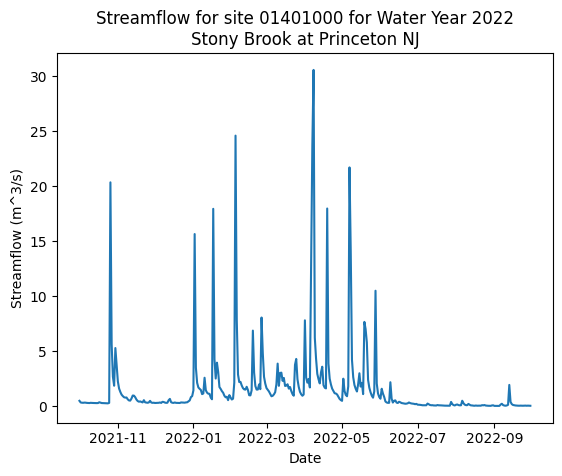

In [4]:
# Plot
plt.plot(data_df)
plt.xlabel("Date")
plt.ylabel(f"Streamflow ({units})")
plt.title(f'Streamflow for site {site_id} for Water Year 2022\n{site_name}')

plt.show()

# If you want to save a version, uncomment the following with your desired file path
# plt.savefig(f'path/to/save/streamflow_{site_id}.png')

## Example 2: Plot data for all locations within a bounding box for one Water Year

In [5]:
# Specify latitude/longitude bounding box
latitude_range = (39, 40)
longitude_range = (-75, -74.8)

# Request data
data_df = get_data(data_source='usgs_nwis', variable='streamflow', 
                   temporal_resolution='daily', aggregation='average', 
                   date_start='2021-10-01', date_end='2022-09-30',
                   latitude_range=latitude_range, longitude_range=longitude_range).set_index('date')

# Set the index to data type 'datetime'
data_df.index = pd.to_datetime(data_df.index)

# Request metadata to get site names
metadata_df = get_metadata(data_source='usgs_nwis', variable='streamflow', 
                           temporal_resolution='daily', aggregation='average', 
                           date_start='2021-10-01', date_end='2022-09-30',
                           latitude_range=latitude_range, longitude_range=longitude_range)

In [6]:
site_ids_data = list(data_df.columns)
site_ids_metadata = list(metadata_df['site_id'])
assert site_ids_data == site_ids_metadata

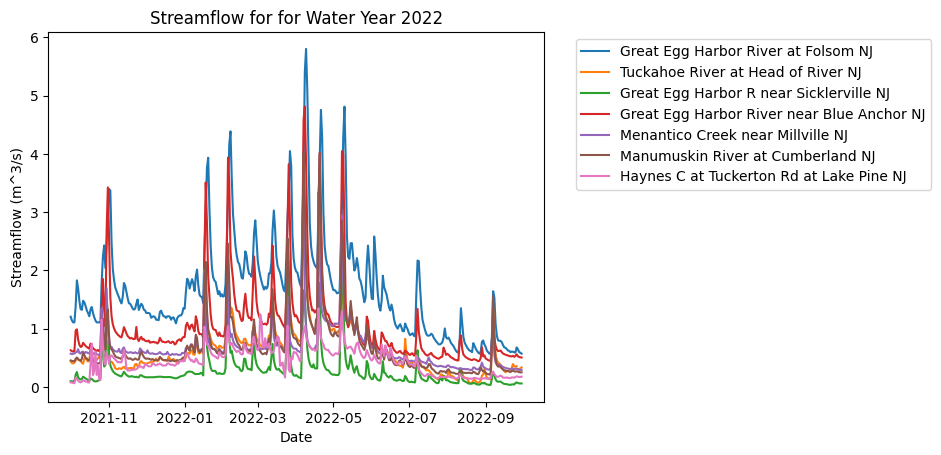

In [7]:
# Set units
units = "m^3/s"

# Plot
plt.plot(data_df)
plt.xlabel("Date")
plt.ylabel(f"Streamflow ({units})")
plt.title(f"Streamflow for for Water Year 2022")

# Create a legend of corresponding site names
# (remove or adjust the bbox_to_anchor parameter to move legend around)
site_names = metadata_df['site_name']
plt.legend(site_names, bbox_to_anchor=(1.05, 1))

plt.show()

# If you want to save a version, uncomment the following with your desired file path
# plt.savefig(f'path/to/save/streamflow.png')